In [1]:
pip install numpy pandas matplotlib tensorflow scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

In [32]:
data = pd.read_excel('predict_energy_consumption.xlsx')
data.head()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
0,24.363503,31.107976,5.234114,705.432695,307.398145
1,38.767858,52.514057,4.939576,817.013258,412.444548
2,33.299849,72.376750,18.125092,325.421109,392.072418
3,29.966462,63.933493,4.990924,662.386690,119.254957
4,18.900466,68.393669,5.438995,614.571385,117.162261


In [33]:
data.tail()


,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
995,17.289552,59.417309,17.305915,497.896331,453.828793
996,37.932839,77.396877,3.145464,400.961061,103.721455
997,18.420466,24.137481,6.195757,455.115084,197.529277
998,38.755934,23.423283,5.800911,576.946528,417.085421
999,26.150144,36.931224,17.428281,245.230623,318.790570


In [34]:
data.describe()

,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [35]:
data.describe(include='all')


,temperature,humidity,wind_speed,solar_irradiance,energy_consumption
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,27.256414,50.421038,10.048115,541.337543,272.347395
std,7.303434,17.531394,5.813484,257.840410,129.064474
min,15.115801,20.193096,0.000233,100.588052,50.013823
25%,20.899332,34.464456,5.227020,317.710693,160.238303
50%,27.420184,51.124034,10.012278,535.851355,272.569144
75%,33.607990,65.627903,15.182071,763.786729,382.997053
max,39.992942,79.964824,19.956417,999.601933,498.987225


In [36]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
temperature,1000.0,27.256414,7.303434,15.115801,20.899332,27.420184,33.607990,39.992942
humidity,1000.0,50.421038,17.531394,20.193096,34.464456,51.124034,65.627903,79.964824
wind_speed,1000.0,10.048115,5.813484,0.000233,5.227020,10.012278,15.182071,19.956417
solar_irradiance,1000.0,541.337543,257.840410,100.588052,317.710693,535.851355,763.786729,999.601933
energy_consumption,1000.0,272.347395,129.064474,50.013823,160.238303,272.569144,382.997053,498.987225


In [37]:
data.columns

Index(['temperature', 'humidity', 'wind_speed', 'solar_irradiance',
       'energy_consumption'],
      dtype='object')

In [38]:
data.shape

(1000, 5)

In [39]:
x = data[['temperature', 'humidity', 'wind_speed', 'solar_irradiance']]
y = data['energy_consumption'].values

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2 , random_state = 42)

In [41]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
import warnings
warnings.filterwarnings('ignore')


In [43]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

In [44]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
#mean square error and mean absolute error

In [45]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 89252.2812 - mae: 268.7393 - val_loss: 83391.1406 - val_mae: 258.4190
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 87189.2812 - mae: 267.0797 - val_loss: 82668.2734 - val_mae: 257.0152
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 89958.7266 - mae: 272.0718 - val_loss: 81584.1719 - val_mae: 254.8979
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 88117.3984 - mae: 267.9305 - val_loss: 80006.6406 - val_mae: 251.7795
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 88307.5547 - mae: 268.3915 - val_loss: 77774.8359 - val_mae: 247.3038
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 84456.4531 - mae: 259.6522 - val_loss: 74710.4531 - val_mae: 241.0137
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 79620.7344 - mae: 251.0191 - val_loss: 70689.6875 - val_mae: 232.4957
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 78588.0547 - mae: 248.6315 - val_loss:

In [46]:
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Mean Absolute Error: {test_mae:.2f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 17864.9551 - mae: 115.2716 
Test Mean Absolute Error: 115.47


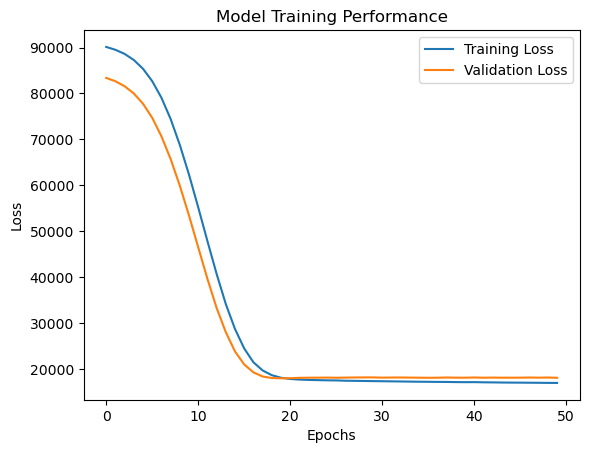

In [47]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Training Performance')
plt.legend()
plt.show()

In [48]:
predictions = model.predict(x_test)
predictions

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([[288.60736],
       [248.5199 ],
       [253.95895],
       [214.30934],
       [324.79855],
       [314.02176],
       [302.9838 ],
       [285.14233],
       [284.63416],
       [278.61166],
       [246.08368],
       [277.4399 ],
       [264.56702],
       [230.52821],
       [306.28052],
       [311.35507],
       [255.0329 ],
       [311.95895],
       [299.25607],
       [258.953  ],
       [267.9732 ],
       [278.77197],
       [288.98785],
       [273.7081 ],
       [248.49704],
       [241.76862],
       [268.128  ],
       [308.4275 ],
       [312.54846],
       [261.79218],
       [233.0613 ],
       [310.4239 ],
       [307.30408],
       [280.8914 ],
       [308.23633],
       [290.28204],
       [219.33066],
       [269.70145],
       [300.4843 ],
       [233.2861 ],
       [242.7525 ],
       [257.8465 ],
       [243.81856],
       [264.6313 ],
       [258.07425],
       [265.70572],
       [261.22943],
       [253.49615],
       [288.14307],
       [288.22174],


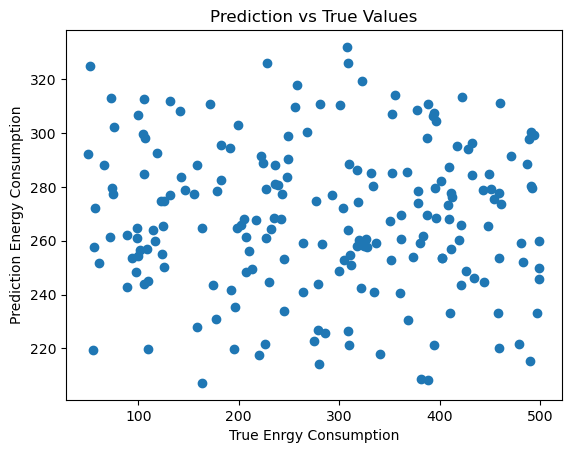

In [50]:
plt.scatter(y_test, predictions)
plt.xlabel('True Enrgy Consumption')
plt.ylabel('Prediction Energy Consumption')
plt.title('Prediction vs True Values')
plt.show()